In [1]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Product of 4 consecutive numbers is always 1 less than a perfect square


<p>
<center>Shubhanshu Mishra (<a href="https://shubhanshu.com">shubhanshu.com</a>)</center>

![Twitter Follow](https://img.shields.io/twitter/follow/TheShubhanshu?style=social) ![YouTube Channel Subscribers](https://img.shields.io/youtube/channel/subscribers/UCZpSoW1pm0jk-jUaGwVWzLA?style=social)
    
</p>

For every $n \in \mathbb{Z}$, we can have 4 consecutive numbers as follows:

$
n, n+1, n+2, n+3
$

We can complete the proof, if we can show that there exists a $k \in \mathbb{Z}$, such that the following equation holds:

$
\begin{equation}
n*(n+1)*(n+2)*(n+3) = (k^2 - 1)
\end{equation}
$


In [2]:
i_max = 4
nums = np.arange(0, 50)+1
consecutive_nums = np.stack([
    np.roll(nums, -i)
    for i in range(i_max)
], axis=1)[:-i_max+1]
n_prods = consecutive_nums.prod(axis=1)
df = pd.DataFrame(consecutive_nums, columns=[f"n{i+1}" for i in range(i_max)])
df["prod"] = n_prods
df["k"] = np.sqrt(n_prods+1).astype(int)
df["k^2"] = df["k"]**2
df["k^2 - 1"] = df["k^2"] - 1
df

,n1,n2,n3,n4,prod,k,k^2,k^2 - 1
0,1,2,3,4,24,5,25,24
1,2,3,4,5,120,11,121,120
2,3,4,5,6,360,19,361,360
3,4,5,6,7,840,29,841,840
4,5,6,7,8,1680,41,1681,1680
5,6,7,8,9,3024,55,3025,3024
6,7,8,9,10,5040,71,5041,5040
7,8,9,10,11,7920,89,7921,7920
8,9,10,11,12,11880,109,11881,11880
9,10,11,12,13,17160,131,17161,17160


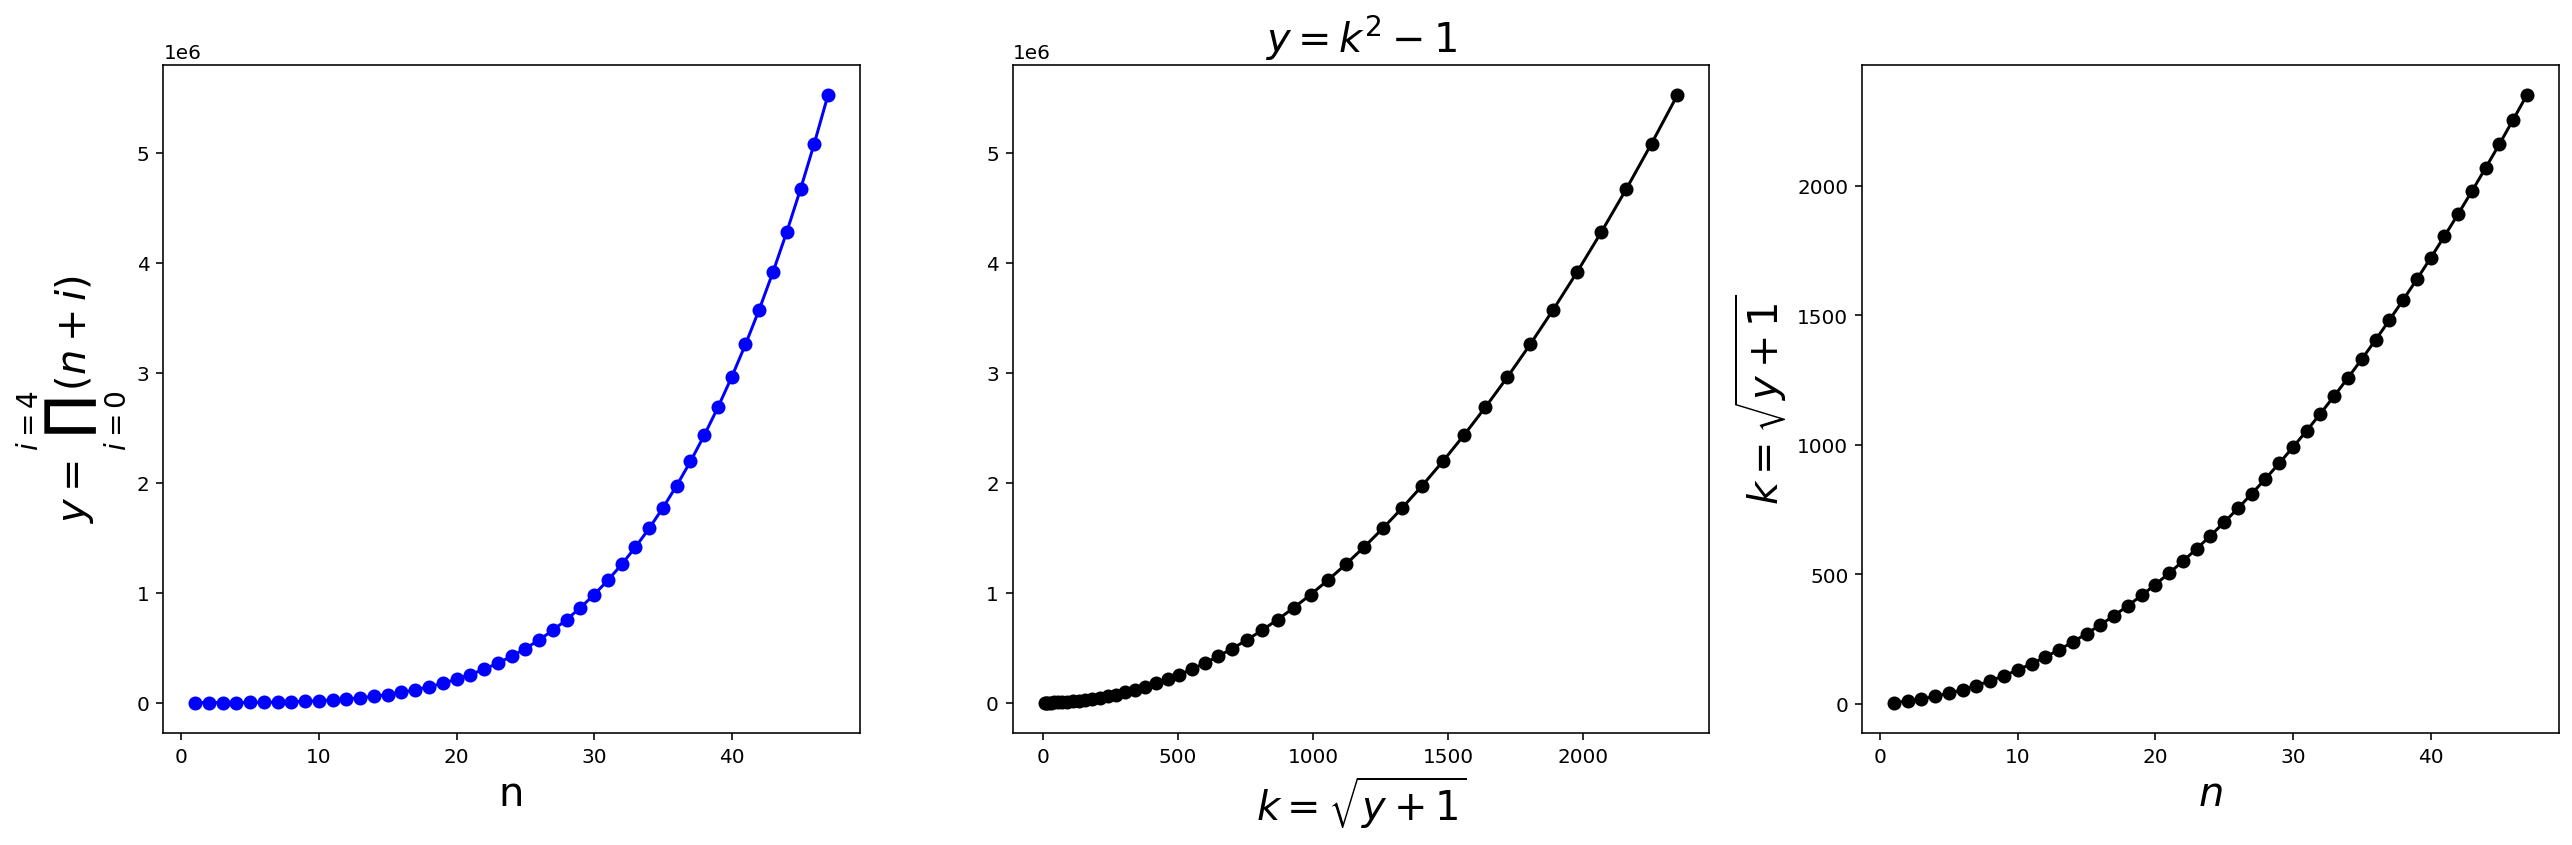

In [3]:
fig, ax = plt.subplots(1,3, figsize=(18, 6))

ax[0].plot("n1", "prod", "bo-", data=df)
ax[0].set_xlabel("n", fontsize=20)
ax[0].set_ylabel(f"$y = \prod_{{i=0}}^{{i={i_max}}} (n+i)$", fontsize=20)

ax[1].plot(df["k"], df["prod"], "ko-")
ax[1].set_xlabel("$k = \sqrt{y + 1}$", fontsize=20)
ax[1].set_title("$y = k^2 - 1$", fontsize=20)


ax[2].plot(df["n1"], df["k"], "ko-")
ax[2].set_ylabel("$k = \sqrt{y + 1}$", fontsize=20)
ax[2].set_xlabel("$n$", fontsize=20)

fig.tight_layout()

Let us look at the right hand side of the equation first, i.e. $k^2 - 1$.

This can be rewritten as $\textbf{(k-1)*(k+1)}$

**Now, this is where a hint lies.**

What the right hand side means that it is a product of two integers ($k-1$ and $k+1$) which differ by 2. 

We can see that this is the case:

$
\begin{equation}
(k+1) - (k-1) \\
= k + 1 - k - (-1) \\
= k - k + 1 - (-1) \\
= 0 + 1 + 1 \\
= 2 \\
\end{equation}
$

So, if we can somehow show that the left hand side of the original equation, i.e. $n*(n+1)*(n+2)*(n+3)$:

* can be represented as a product of two numbers which differ by 2, then we are done, 
* as these numbers can then be mapped to $k-1$ and $k+1$ for some $k \in \mathbb{Z}$.

We can group the numbers $\textbf{n, n+1, n+2, n+3}$ into pairs, with the hope of getting $k-1$ and $k+1$.

We can utilize following facts to choose the two pairs:

* The difference of the products should be constant, and hence independent of $n$
* Knowing that product of two factors of type $(n+i)*(n+j) = n^2 + (i+j)*n + i*j$,
* We can observe that $i+j$ will be same for numbers which are equidistant from the middle of all numbers.

Now we can select our pair of numbers.

* The first pair is $n$ and $(n+3)$, 
    * and their product is $\textbf{n * (n+3)}$ 
    * which can be expanded as $\color{red}{\textbf{n^2 + 3n}}$

* And, the second pair $(n+1)$ and $(n+2)$, 
    * and their product is $\textbf{(n+1)*(n+2)}$ 
    * which can be expanded as $\color{red}{\textbf{n^2 + 3n}} + \textbf{2}$

Based on the above pairing we can immediately see that the difference of these pair products is as follows:

$
\begin{equation}
[(n+1)*(n+2)] - [n * (n+3)]\\
= [\color{red}{n^2 + 3n} + 2] - [\color{red}{n^2 + 3n}]\\
= n^2 + 3n + 2 - n^2 - 3n\\
= (n^2 -n^2) + (3n - 3n) + 2\\
= 0 + 0 + 2\\
= 2
\end{equation}
$

Hence, based on the above simplification, we can map: 

* $(\color{red}{n^2 + 3n} + 2) \rightarrow (k+1)$, and 
* $(\color{red}{n^2 + 3n}) \rightarrow (k-1)$. 

Now, if we choose $\color{blue}{\textbf{k = (n^2 + 3n + 1)}}$, the following equations hold: 

* $n^2 + 3n + 2 = \color{blue}{(n^2 + 3n + 1)} + 1 = \color{blue}{k} + 1$

* $n^2 + 3n = \color{blue}{(n^2 + 3n + 1)} - 1 = \color{blue}{k} - 1$

Hence, we have proved the following:

$
\begin{equation}
\forall n \in \mathbb{Z}, \\
\exists k \in \mathbb{Z} \\
n*(n+1)*(n+2)*(n+3) \\
= [(n+3)*n]*[(n+1)*(n+2)]\\
= [\color{red}{n^2 + 3n}]*[\color{red}{n^2 + 3n} + 2]\\
= [\color{blue}{(n^2 + 3n + 1)} - 1]*[\color{blue}{(n^2 + 3n + 1)} + 1]\\
= [\color{blue}{k} - 1]*[\color{blue}{k} + 1]\\
= (k^2 - 1)
\end{equation}
$

And this equation can be solved by choosing $\color{blue}{\textbf{k = (n^2 + 3n + 1)}}$.

Hence, proved.

In [4]:
df["k = n^2 + 3n + 1"] = (df["n1"]**2 + 3*df["n1"] + 1)
df

,n1,n2,n3,n4,prod,k,k^2,k^2 - 1,k = n^2 + 3n + 1
0,1,2,3,4,24,5,25,24,5
1,2,3,4,5,120,11,121,120,11
2,3,4,5,6,360,19,361,360,19
3,4,5,6,7,840,29,841,840,29
4,5,6,7,8,1680,41,1681,1680,41
5,6,7,8,9,3024,55,3025,3024,55
6,7,8,9,10,5040,71,5041,5040,71
7,8,9,10,11,7920,89,7921,7920,89
8,9,10,11,12,11880,109,11881,11880,109
9,10,11,12,13,17160,131,17161,17160,131


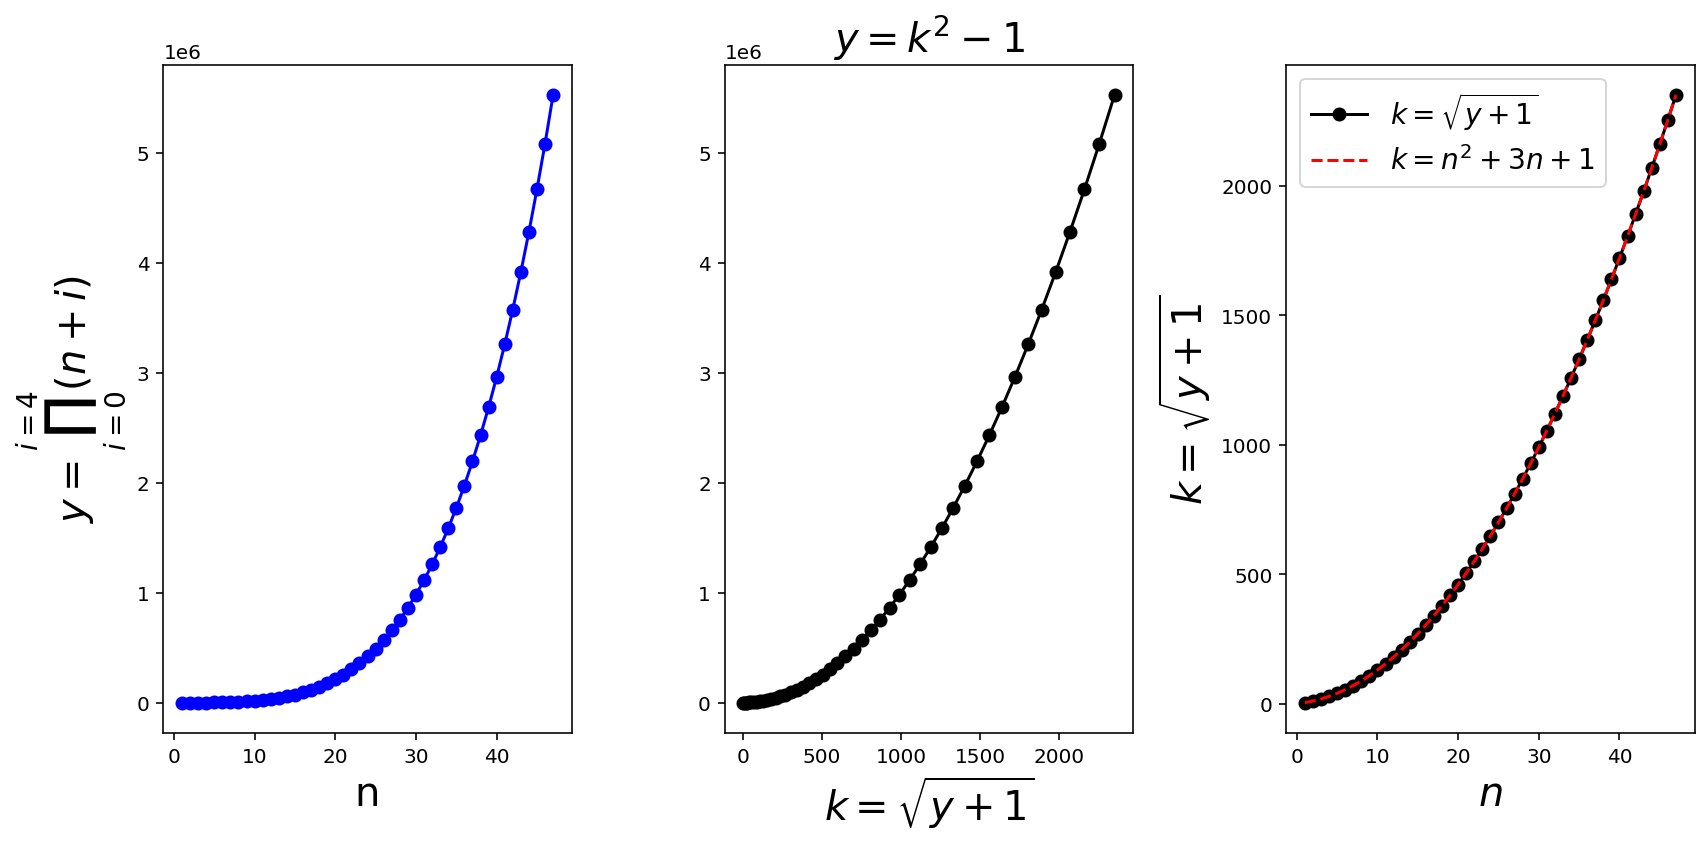

In [5]:
fig, ax = plt.subplots(1,3, figsize=(12, 6))

ax[0].plot("n1", "prod", "bo-", data=df)
ax[0].set_xlabel("n", fontsize=20)
ax[0].set_ylabel(f"$y = \prod_{{i=0}}^{{i={i_max}}} (n+i)$", fontsize=20)

ax[1].plot(df["k"], df["prod"], "ko-")
ax[1].set_xlabel("$k = \sqrt{y + 1}$", fontsize=20)
ax[1].set_title("$y = k^2 - 1$", fontsize=20)


ax[2].plot(df["n1"], df["k"], "ko-", label="$k = \sqrt{y + 1}$")
ax[2].plot(df["n1"], df["k = n^2 + 3n + 1"], "r--", label="$k = n^2 + 3n + 1$")
ax[2].legend(fontsize=14)

ax[2].set_ylabel("$k = \sqrt{y + 1}$", fontsize=20)
ax[2].set_xlabel("$n$", fontsize=20)

fig.tight_layout()

# More videos to come


<p>
<center>Shubhanshu Mishra (<a href="https://shubhanshu.com">shubhanshu.com</a>)</center>

![Twitter Follow](https://img.shields.io/twitter/follow/TheShubhanshu?style=social) ![YouTube Channel Subscribers](https://img.shields.io/youtube/channel/subscribers/UCZpSoW1pm0jk-jUaGwVWzLA?style=social)
    
</p>

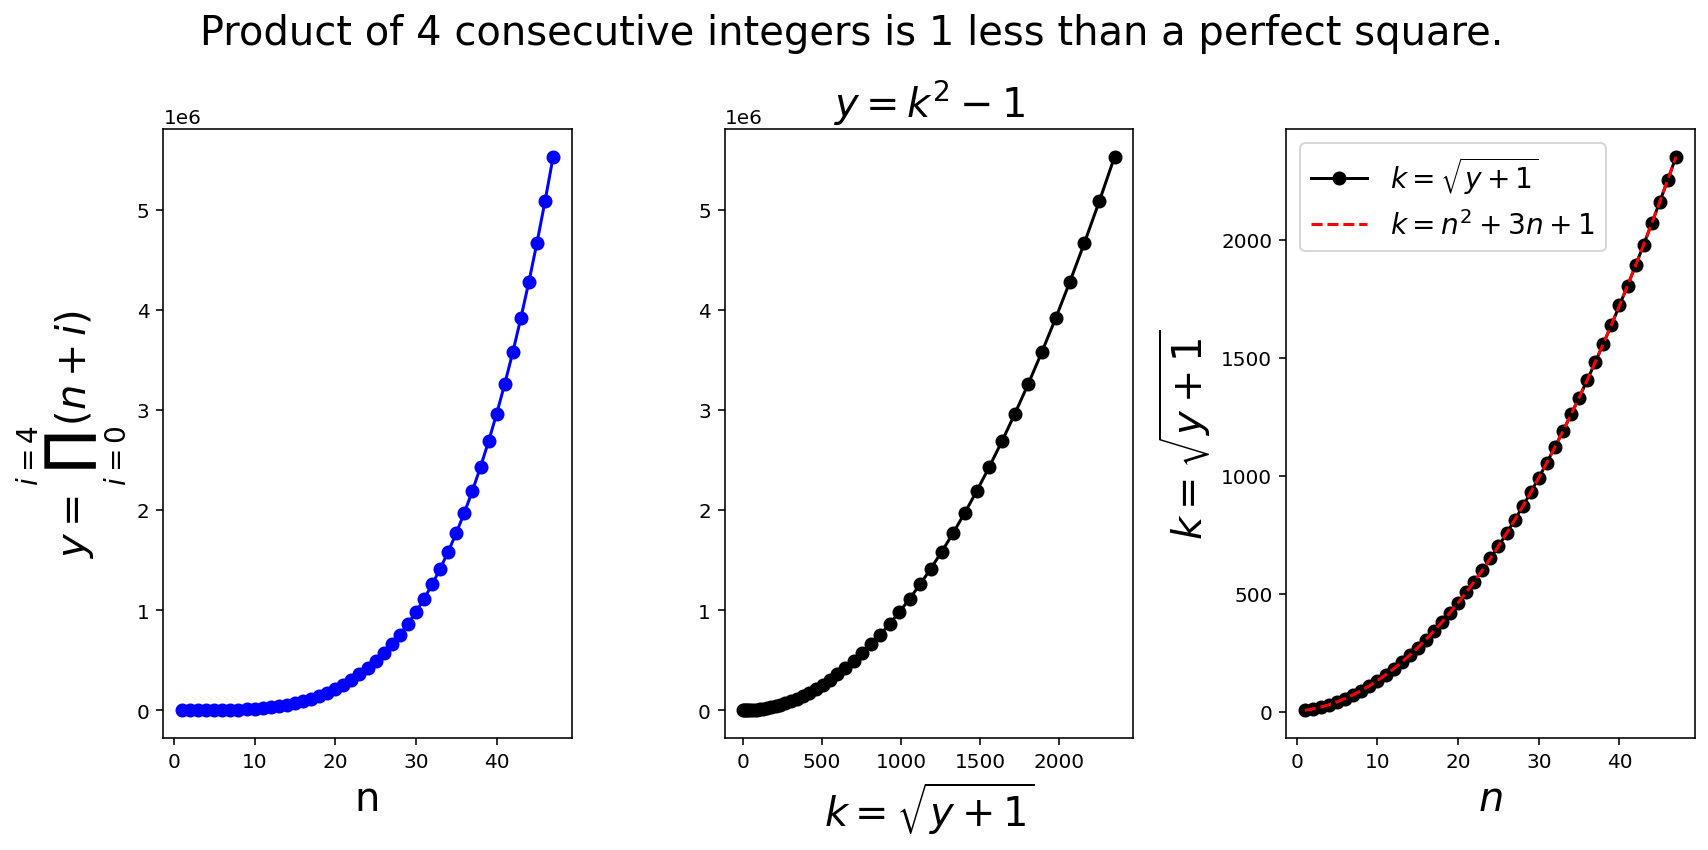

In [6]:
fig, ax = plt.subplots(1,3, figsize=(12, 6))
fig.patch.set_facecolor('white')


ax[0].plot("n1", "prod", "bo-", data=df)
ax[0].set_xlabel("n", fontsize=20)
ax[0].set_ylabel(f"$y = \prod_{{i=0}}^{{i={i_max}}} (n+i)$", fontsize=20)

ax[1].plot(df["k"], df["prod"], "ko-")
ax[1].set_xlabel("$k = \sqrt{y + 1}$", fontsize=20)
ax[1].set_title("$y = k^2 - 1$", fontsize=20)


ax[2].plot(df["n1"], df["k"], "ko-", label="$k = \sqrt{y + 1}$")
ax[2].plot(df["n1"], df["k = n^2 + 3n + 1"], "r--", label="$k = n^2 + 3n + 1$")
ax[2].legend(fontsize=14)

ax[2].set_ylabel("$k = \sqrt{y + 1}$", fontsize=20)
ax[2].set_xlabel("$n$", fontsize=20)


fig.suptitle(f"Product of 4 consecutive integers is 1 less than a perfect square.", fontsize=20)

fig.tight_layout()

## Related works


* P. Erdös. J. L. Selfridge. "The product of consecutive integers is never a power." Illinois J. Math. 19 (2) 292 - 301, June 1975. https://doi.org/10.1215/ijm/1256050816

## Visual Proof

<AxesSubplot:>

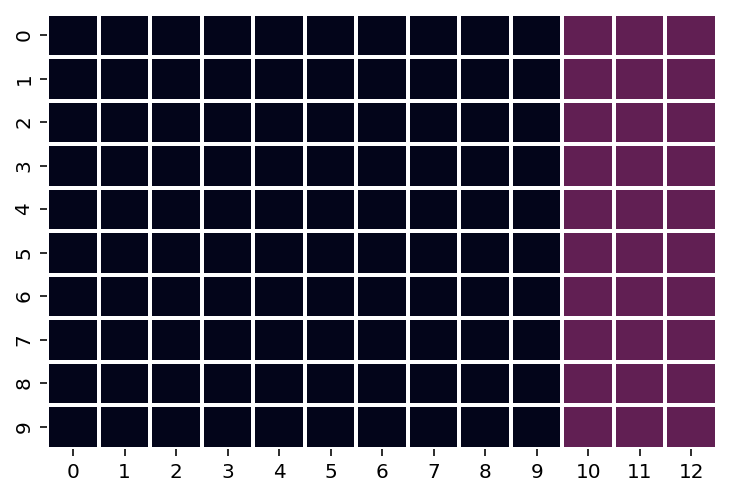

In [7]:
nums = np.arange(10,10+4)
A = np.zeros((nums[0], nums[-1]))
A[:, nums[0]:] = 1
sns.heatmap(A, linewidth=2, cbar=False, vmin=0, vmax=4)

<AxesSubplot:>

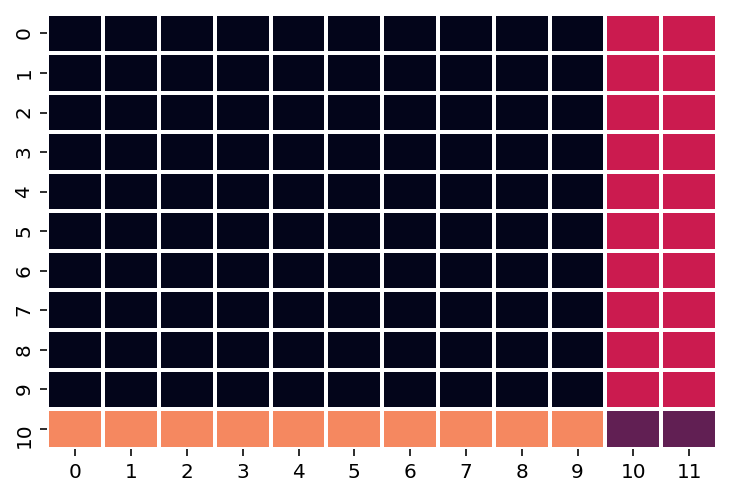

In [8]:
nums = np.arange(10,10+4)
A = np.zeros((nums[1], nums[2]))
A[:, nums[0]:] = 2
A[nums[0]:, :] = 3
A[nums[0]:, nums[0]:] = 1

sns.heatmap(A, linewidth=2, cbar=False, vmin=0, vmax=4)

In [9]:
import matplotlib.animation as animation
from IPython.display import HTML

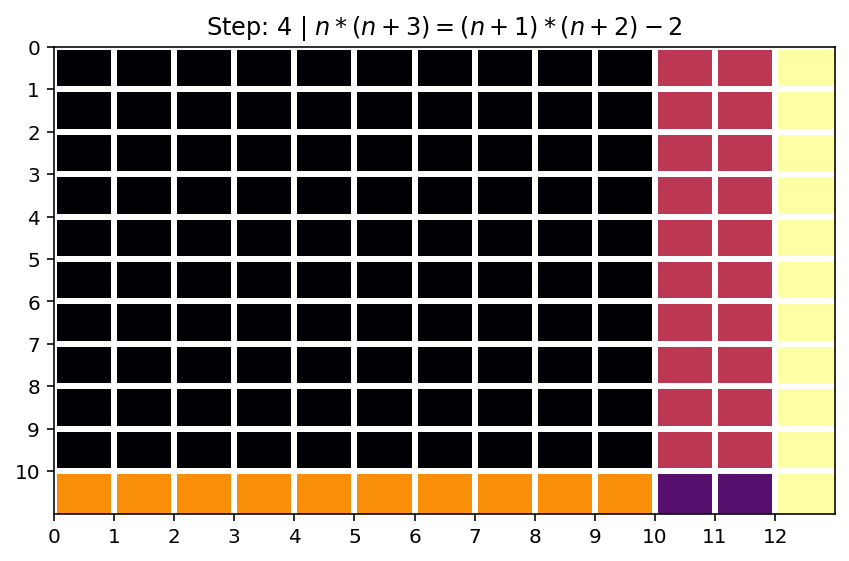

In [13]:
fig, ax = plt.subplots(1,1)
frames = []

nums = np.arange(10,10+4)
A = np.zeros((nums[1], nums[-1]))

im = ax.pcolormesh(A, cmap="inferno", vmin=0, vmax=4)
title = ax.set_title(f"Start")
ax.invert_yaxis()
ax.set_xticks(np.arange(A.shape[1]))
ax.set_yticks(np.arange(A.shape[0]))
ax.grid(which="major", color="w", linestyle='-', linewidth=3)


def init():
    im.set_array(A)
    title.set_text("")
    return im, title

def animate(i):
    text = ""
    if i == 0:
        A[:, nums[0]:] = 4
        A[nums[0]:, :] = 4
        text = "$n * n$"
    if i == 1:
        A[:, nums[0]:] = 2
        A[nums[0]:, ] = 4
        text = "$n * (n+3)$"
    if i == 2:
        A[:, nums[0]:] = 2
        A[:, nums[2]:] = 3
        A[nums[0]:, ] = 4
        text = "$n * (n+3)$"
    if i == 3:
        A[:, nums[2]:] = 4
        A[nums[0]:, :] = 3
        A[nums[0]:, nums[0]:] = 4
        A[nums[0]:, nums[0]:nums[2]] = 4
        text = "$(n+1) * (n+2)$"
    if i == 4:
        A[nums[0]:, nums[0]:nums[2]] = 1
        text = "$n * (n+3) = (n+1)*(n+2) - 2$"
#     print(A)
    im.set_array(A)
    title.set_text(f"Step: {i} | {text}")
    return im, title

# ax = sns.heatmap(A, linewidth=2, cbar=False, vmin=0, vmax=4)

fig.tight_layout()

ani = animation.FuncAnimation(fig,animate,frames=5,interval=2000,blit=True,repeat=True)

HTML(ani.to_html5_video())
# frames

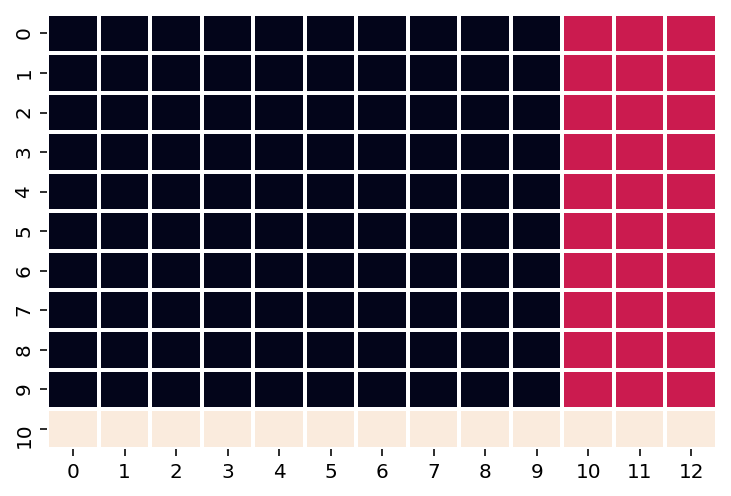

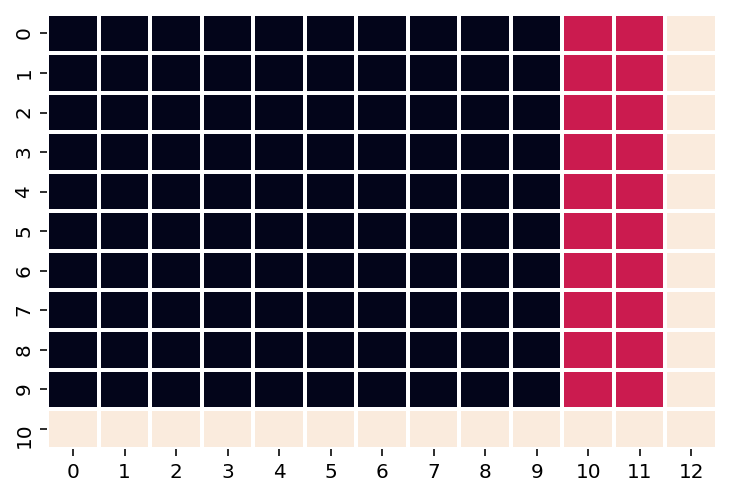

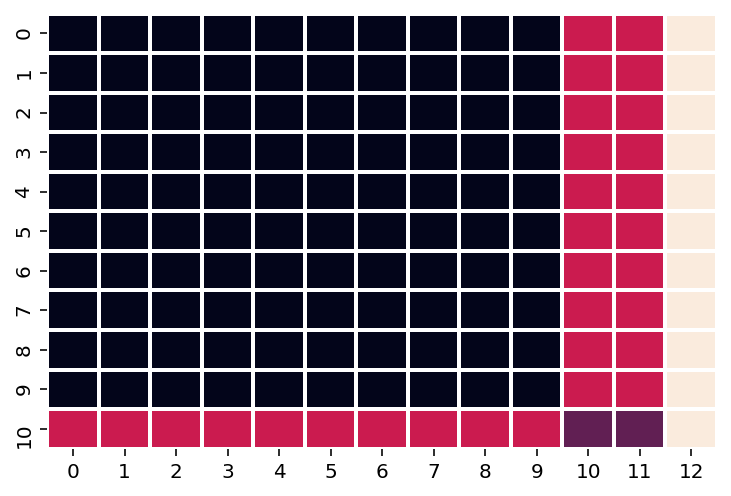

In [11]:
# ax.cla()
nums = np.arange(10,10+4)
A = np.zeros((nums[1], nums[-1]))
A[:, nums[0]:] = 2
A[nums[0]:, ] = 4
sns.heatmap(A, linewidth=2, cbar=False, vmin=0, vmax=4)
plt.show()
# plt.pause(1)

A[:, nums[2]:] = 4
sns.heatmap(A, linewidth=2, cbar=False, vmin=0, vmax=4)
plt.show()
# plt.pause(1)

A[nums[0]:, :] = 2
A[nums[0]:, nums[0]:] = 4
A[nums[0]:, nums[0]:nums[2]] = 1
sns.heatmap(A, linewidth=2, cbar=False, vmin=0, vmax=4)
plt.show()
# plt.pause(1)

<AxesSubplot:>

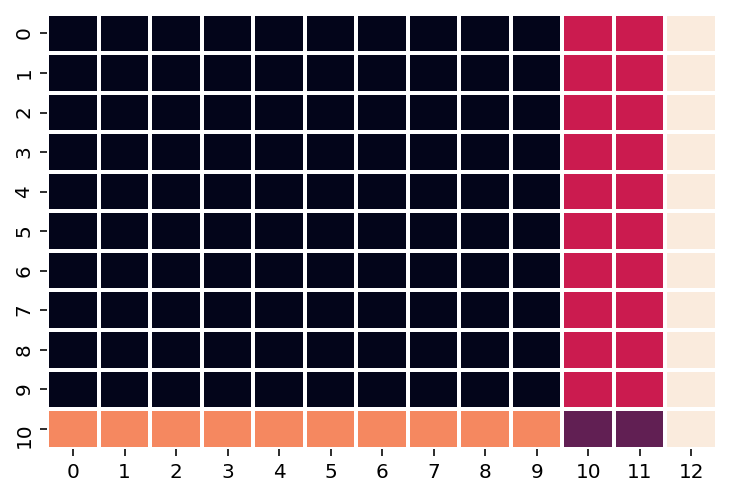

In [12]:
nums = np.arange(10,10+4)
A = np.zeros((nums[1], nums[-1]))
A[:, nums[0]:] = 2
A[nums[0]:, :] = 3
A[nums[0]:, nums[0]:] = 1
A[:, nums[2]:] = 4
sns.heatmap(A, linewidth=2, cbar=False, vmin=0, vmax=4)